In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

from itertools import product


import sys
import importlib


sys.path.append(r"C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1")
sys.path.append(r"C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\current_measurements")


import current_measurements.src.src_current_measurement_simulations
importlib.reload(current_measurements.src.src_current_measurement_simulations);
from current_measurements.src.src_current_measurement_simulations import CurrentMeasurementSimulation

import current_measurements.src.src_current_measurement_simulations_particle_sector
importlib.reload(current_measurements.src.src_current_measurement_simulations_particle_sector);
from current_measurements.src.src_current_measurement_simulations_particle_sector import CurrentMeasurementSimulationParticleSector


In [76]:
num_levels = 5
num_qubits = 8
num_particles = 4

J = -6 * 2 * np.pi # MHz
J_parallel = -abs(J)

U = -180 * 2 * np.pi # MHz

times = np.linspace(0,0.1,101)
measurement_detunings = np.array([400, 400, -300, -300, 300, 300, -300, -300])*2*np.pi

# psi0 = qt.Qobj([1,0])
psi0 = -1


simulation = CurrentMeasurementSimulationParticleSector(num_levels, num_qubits, num_particles, J, J_parallel, U, times,
                                                        [1,2], [3,4], measurement_detuning=measurement_detunings, psi0=psi0, T1=None, T2=None)



Number of basis states: 330
[(4, 0, 0, 0, 0, 0, 0, 0), (3, 1, 0, 0, 0, 0, 0, 0), (2, 2, 0, 0, 0, 0, 0, 0), (1, 3, 0, 0, 0, 0, 0, 0), (0, 4, 0, 0, 0, 0, 0, 0), (3, 0, 1, 0, 0, 0, 0, 0), (2, 1, 1, 0, 0, 0, 0, 0), (1, 2, 1, 0, 0, 0, 0, 0), (0, 3, 1, 0, 0, 0, 0, 0), (2, 0, 2, 0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 0, 0, 0), (0, 2, 2, 0, 0, 0, 0, 0), (1, 0, 3, 0, 0, 0, 0, 0), (0, 1, 3, 0, 0, 0, 0, 0), (0, 0, 4, 0, 0, 0, 0, 0), (3, 0, 0, 1, 0, 0, 0, 0), (2, 1, 0, 1, 0, 0, 0, 0), (1, 2, 0, 1, 0, 0, 0, 0), (0, 3, 0, 1, 0, 0, 0, 0), (2, 0, 1, 1, 0, 0, 0, 0), (1, 1, 1, 1, 0, 0, 0, 0), (0, 2, 1, 1, 0, 0, 0, 0), (1, 0, 2, 1, 0, 0, 0, 0), (0, 1, 2, 1, 0, 0, 0, 0), (0, 0, 3, 1, 0, 0, 0, 0), (2, 0, 0, 2, 0, 0, 0, 0), (1, 1, 0, 2, 0, 0, 0, 0), (0, 2, 0, 2, 0, 0, 0, 0), (1, 0, 1, 2, 0, 0, 0, 0), (0, 1, 1, 2, 0, 0, 0, 0), (0, 0, 2, 2, 0, 0, 0, 0), (1, 0, 0, 3, 0, 0, 0, 0), (0, 1, 0, 3, 0, 0, 0, 0), (0, 0, 1, 3, 0, 0, 0, 0), (0, 0, 0, 4, 0, 0, 0, 0), (3, 0, 0, 0, 1, 0, 0, 0), (2, 1, 0, 0, 1, 0, 0, 0), (1, 2, 0,

In [47]:
eigenvalues = simulation.particle_number_to_eigenenergy[num_particles]
eigenstates = simulation.particle_number_to_eigenstate[num_particles]

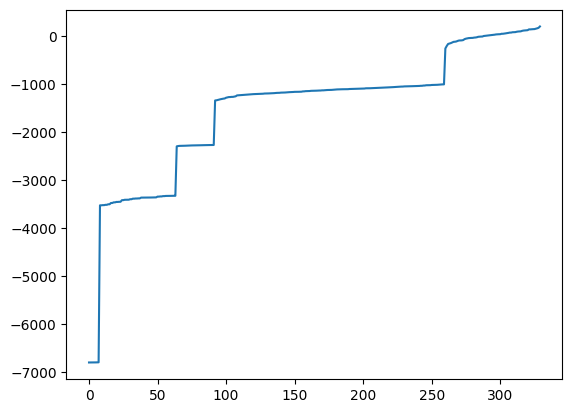

In [48]:
# for i in range(len(eigenvalues)):

plt.plot(eigenvalues)

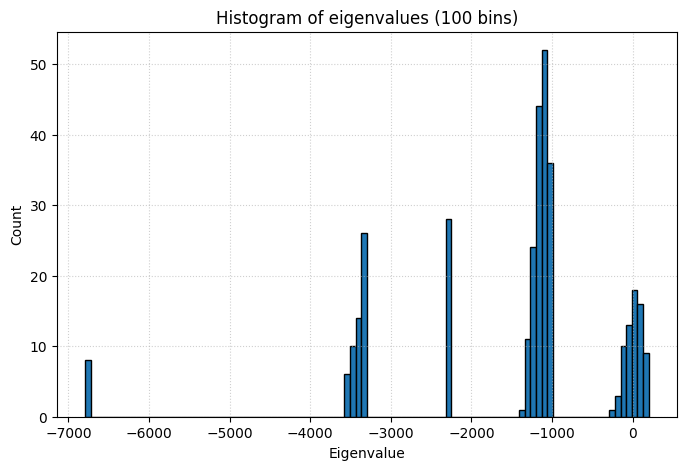

In [50]:
plt.figure(figsize=(8,5))
plt.hist(eigenvalues, bins=100, edgecolor='k')
plt.xlabel('Eigenvalue')
plt.ylabel('Count')
plt.title('Histogram of eigenvalues (100 bins)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [51]:
# find smallest eigenvalue greater than -800 and its index in the original list
candidates = [v for v in eigenvalues if v > -800]
if not candidates:
    print("No eigenvalue greater than -800 found.")
else:
    min_val = min(candidates)
    idx = eigenvalues.index(min_val)
    print("index:", idx, "value:", min_val)

index: 260 value: -259.2236660123499


In [52]:
lowest_eigenstate = eigenstates[idx]
highest_eigenstate = eigenstates[-1]

In [53]:
# print(lowest_eigenstate)
# print(highest_eigenstate)

print(lowest_eigenstate.dag()*highest_eigenstate)

(-2.250877838535704e-16+0j)


In [54]:
# apply pi pulse to every qubit

pi_pulse_operator = np.diag(np.ones(len(lowest_eigenstate.full())))[:,::-1]

flipped_state = qt.Qobj(pi_pulse_operator) * lowest_eigenstate



In [55]:
print(flipped_state.dag()*highest_eigenstate)

(0.0574523560875701+0j)


In [56]:
basis = product(range(num_levels), repeat=num_qubits)

basis_4_particles = [state for state in basis if sum(state) == num_particles]

print(basis_4_particles)
print(len(basis_4_particles))

[(0, 0, 0, 0, 0, 0, 0, 4), (0, 0, 0, 0, 0, 0, 1, 3), (0, 0, 0, 0, 0, 0, 2, 2), (0, 0, 0, 0, 0, 0, 3, 1), (0, 0, 0, 0, 0, 0, 4, 0), (0, 0, 0, 0, 0, 1, 0, 3), (0, 0, 0, 0, 0, 1, 1, 2), (0, 0, 0, 0, 0, 1, 2, 1), (0, 0, 0, 0, 0, 1, 3, 0), (0, 0, 0, 0, 0, 2, 0, 2), (0, 0, 0, 0, 0, 2, 1, 1), (0, 0, 0, 0, 0, 2, 2, 0), (0, 0, 0, 0, 0, 3, 0, 1), (0, 0, 0, 0, 0, 3, 1, 0), (0, 0, 0, 0, 0, 4, 0, 0), (0, 0, 0, 0, 1, 0, 0, 3), (0, 0, 0, 0, 1, 0, 1, 2), (0, 0, 0, 0, 1, 0, 2, 1), (0, 0, 0, 0, 1, 0, 3, 0), (0, 0, 0, 0, 1, 1, 0, 2), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 0, 1, 1, 2, 0), (0, 0, 0, 0, 1, 2, 0, 1), (0, 0, 0, 0, 1, 2, 1, 0), (0, 0, 0, 0, 1, 3, 0, 0), (0, 0, 0, 0, 2, 0, 0, 2), (0, 0, 0, 0, 2, 0, 1, 1), (0, 0, 0, 0, 2, 0, 2, 0), (0, 0, 0, 0, 2, 1, 0, 1), (0, 0, 0, 0, 2, 1, 1, 0), (0, 0, 0, 0, 2, 2, 0, 0), (0, 0, 0, 0, 3, 0, 0, 1), (0, 0, 0, 0, 3, 0, 1, 0), (0, 0, 0, 0, 3, 1, 0, 0), (0, 0, 0, 0, 4, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 3), (0, 0, 0, 1, 0, 0, 1, 2), (0, 0, 0, 1, 0, 0, 2, 1), (0, 0, 0, 1

In [57]:
# build projector onto states in basis_4_particles with at most one particle per site
single_occupancy_inds = [i for i, state in enumerate(basis_4_particles) if all(x <= 1 for x in state)]

# sanity
print("number of basis states with at most one particle per site:", len(single_occupancy_inds))  # should be comb(8,4)=70

# this number should be equal to comb(8,4)
from math import comb
print("comb(8,4) =", comb(8, 4))

mask = np.zeros(len(basis_4_particles), dtype=float)
mask[single_occupancy_inds] = 1.0

# create Qobj projector in the same dims as the eigenstate/kets (operator dims = [N],[N])
N = len(basis_4_particles)
proj_op = qt.Qobj(np.diag(mask), dims=[eigenstates[0].dims[0], eigenstates[0].dims[0]])

# example: probability that lowest_eigenstate lies in that subspace
prob_lowest = lowest_eigenstate.dag() * proj_op * lowest_eigenstate
print("projection probability (lowest_eigenstate):", prob_lowest)

# example: probability that highest_eigenstate lies in that subspace
prob_highest = highest_eigenstate.dag() * proj_op * highest_eigenstate
print("projection probability (highest_eigenstate):", prob_highest)

# proj_op can now be used to project any ket in this 4-particle sector: projected_ket = proj_op * some_ket

number of basis states with at most one particle per site: 70
comb(8,4) = 70
projection probability (lowest_eigenstate): (0.9656252730393722+0j)
projection probability (highest_eigenstate): (0.9934425521635979+0j)


In [58]:
lowest_data = lowest_eigenstate.full().flatten()
highest_data = highest_eigenstate.full().flatten()

lowest_sum_subspace = 0
lowest_sum_outside = 0
lowest_max_amplitude = 0
lowest_max_index = -1

highest_sum_subspace = 0
highest_sum_outside = 0
highest_max_amplitude = 0
highest_max_index = -1
for i in range(len(basis_4_particles)):
    # print(basis_4_particles[i], " lowest:", (abs(lowest_data[i])**2), " highest:", (abs(highest_data[i])**2))
     
    if abs(lowest_data[i])**2 > lowest_max_amplitude:
        lowest_max_amplitude = abs(lowest_data[i])**2
        lowest_max_index = i

    if abs(highest_data[i])**2 > highest_max_amplitude:
        highest_max_amplitude = abs(highest_data[i])**2
        highest_max_index = i

    if any(np.array(basis_4_particles[i]) > 1):
        lowest_sum_outside += abs(lowest_data[i])**2
        highest_sum_outside += abs(highest_data[i])**2
    else:
        lowest_sum_subspace += abs(lowest_data[i])**2
        highest_sum_subspace += abs(highest_data[i])**2

print("lowest_eigenstate sum in subspace:", lowest_sum_subspace, " outside subspace:", lowest_sum_outside)
print("highest_eigenstate sum in subspace:", highest_sum_subspace, " outside subspace:", highest_sum_outside)

print(f'lowest_eigenstate max amplitude {lowest_max_amplitude} at index {lowest_max_index}, state {basis_4_particles[lowest_max_index]}')
print(f'highest_eigenstate max amplitude {highest_max_amplitude} at index {highest_max_index}, state {basis_4_particles[highest_max_index]}')

lowest_eigenstate sum in subspace: 0.9656252730393722  outside subspace: 0.034374726960627586
highest_eigenstate sum in subspace: 0.9934425521635979  outside subspace: 0.006557447836402315
lowest_eigenstate max amplitude 0.040779097532293515 at index 236, state (1, 0, 0, 1, 1, 0, 0, 1)
highest_eigenstate max amplitude 0.08078171394325881 at index 236, state (1, 0, 0, 1, 1, 0, 0, 1)


In [60]:
# build flip operator on the 4-particle sector: flip 0<->1 for states with only 0s and 1s;
# leave other basis states unchanged (identity action)
N = len(basis_4_particles)
state_to_index = {state: i for i, state in enumerate(basis_4_particles)}

mat = np.zeros((N, N), dtype=complex)
for i, state in enumerate(basis_4_particles):
    if mask[i] == 1.0:  # single-occupancy (only 0/1 entries)
        flipped = tuple(1 - x for x in state)
        j = state_to_index.get(flipped)
        if j is None:
            raise RuntimeError(f"Flipped state {flipped} not found in basis.")
        mat[j, i] = 1.0
    else:
        mat[i, i] = 1.0  # leave outside states unchanged

flip_op = qt.Qobj(mat, dims=[eigenstates[0].dims[0], eigenstates[0].dims[0]])

# sanity checks
I = qt.qeye(N)
unitary_error = (flip_op.dag() * flip_op - I).full()
print("max |U^†U - I| =", np.max(np.abs(unitary_error)))
# example: check mapping of one single-occupancy basis ket
example_idx = single_occupancy_inds[0]
print("example mapping:", basis_4_particles[example_idx], "->", basis_4_particles[state_to_index[tuple(1 - np.array(basis_4_particles[example_idx]))]])

max |U^†U - I| = 0.0
example mapping: (0, 0, 0, 0, 1, 1, 1, 1) -> (1, 1, 1, 1, 0, 0, 0, 0)


In [61]:
flipped_state = flip_op * lowest_eigenstate

overlap = flipped_state.dag() * highest_eigenstate
print("overlap between flipped lowest_eigenstate and highest_eigenstate:", overlap)

overlap between flipped lowest_eigenstate and highest_eigenstate: (-9.858779292537206e-05+0j)


In [ ]:
simulation.psi0 = lowest_eigenstate
simulation.psi0 = highest_eigenstate


In [77]:
simulation.run_simulation()


In [78]:
current_correlation_from_operator = simulation.get_current_correlation_from_operator()

In [79]:
print(current_correlation_from_operator)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


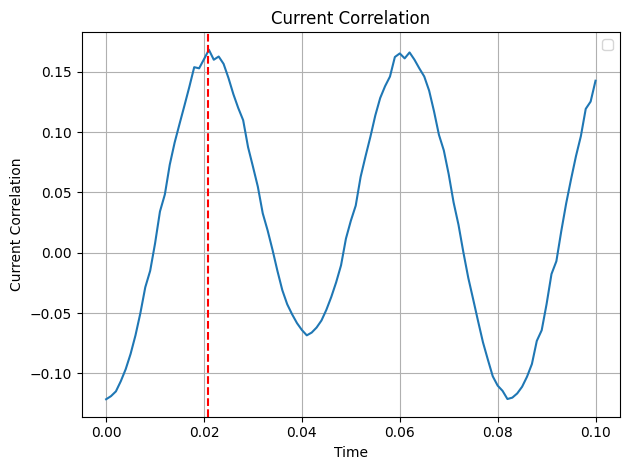

In [80]:
simulation.plot_current_correlation()

In [81]:
current_operators = simulation.current_operators

for i in range(len(current_operators)):
    print(f"Current operator {i}:")
    print(current_operators[i])

Current operator 0:
Quantum object: dims=[[330], [330]], shape=(330, 330), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. +0.j         0.+37.69911184j 0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 [0.-37.69911184j 0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 [0. +0.j         0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 ...
 [0. +0.j         0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 [0. +0.j         0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 [0. +0.j         0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]]
Current operator 1:
Quantum object: dims=[[330], [330]], shape=(330, 330), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. +0.j         0. +0.j         0. +0.j         ... 0. +0.j
  0. +0.j         0. +0.j        ]
 [0. +0.j         0. +0.j         0.+37.69911184j ... 0. +0.j
  0

In [ ]:
current_operator_1 = simulation.current_operators[0]

state_1 = qt.Qobj()